## Bayesian Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

### Exercise: Simple Linear Regression 

In [6]:
np.random.seed(123)

N = 100
x = np.random.normal(10,1,N)
print('x', x)
eps = np.random.normal(0,0.5,size=N)

alpha_real = 2.5  
beta_real = 0.9 

y_real = alpha_real + beta_real*x 

y = y_real + eps 

x [ 8.9143694  10.99734545 10.2829785   8.49370529  9.42139975 11.65143654
  7.57332076  9.57108737 11.26593626  9.1332596   9.32111385  9.90529103
 11.49138963  9.361098    9.55601804  9.56564872 12.20593008 12.18678609
 11.0040539  10.3861864  10.73736858 11.49073203  9.06416613 11.17582904
  8.74611933  9.3622485  10.9071052   8.5713193   9.85993128  9.1382451
  9.74438063  7.20141089  8.2284669   9.30012277 10.92746243  9.82636432
 10.00284592 10.68822271  9.12046366 10.28362732  9.19463348  8.27233051
  9.60910021 10.57380586 10.33858905  9.98816951 12.39236527 10.41291216
 10.97873601 12.23814334  8.70591468  8.96121179 11.74371223  9.20193726
 10.02968323 11.06931597 10.89070639 11.75488618 11.49564414 11.06939267
  9.22729129 10.79486267 10.31427199  8.67373454 11.41729905 10.80723653
 10.04549008  9.76690794  8.80169886 10.19952407 10.46843912  9.16884502
 11.16220405  8.90279695  7.87689965 11.03972709  9.59663396  9.87397041
  9.16248328  8.39403724 11.25523737  9.31113102 1

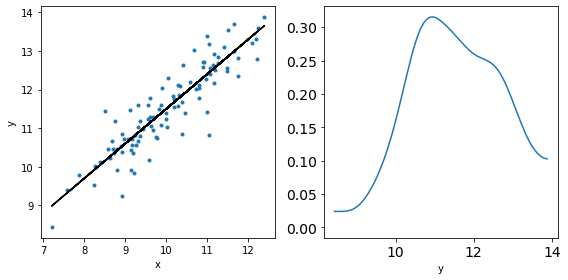

In [7]:
_, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(x,y,'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].plot(x,y_real,'k')
az.plot_kde(y,ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

In [8]:
#!pip install pymc3

In [10]:
import pymc3 as pm

with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=α + β * x, sd=ϵ, observed=y)

    trace_g = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'α'}>],
       [<AxesSubplot:title={'center':'β'}>,
        <AxesSubplot:title={'center':'β'}>],
       [<AxesSubplot:title={'center':'ϵ'}>,
        <AxesSubplot:title={'center':'ϵ'}>]], dtype=object)

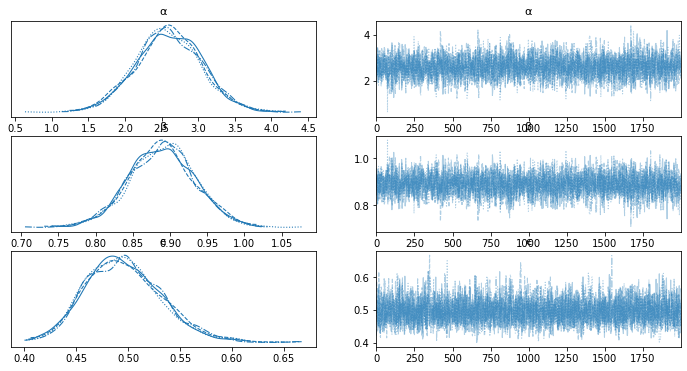

In [11]:
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])

In [12]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,2.595,0.447,1.728,3.404,0.009,0.006,2733.0,3003.0,1.0
β,0.889,0.044,0.804,0.972,0.001,0.001,2707.0,3044.0,1.0
ϵ,0.496,0.036,0.431,0.566,0.001,0.000,3258.0,2847.0,1.0
μ[0],10.524,0.070,10.398,10.662,0.001,0.001,3636.0,4872.0,1.0
μ[1],12.377,0.065,12.252,12.498,0.001,0.001,4269.0,5502.0,1.0
...,...,...,...,...,...,...,...,...,...
μ[95],12.407,0.066,12.280,12.530,0.001,0.001,4202.0,5346.0,1.0
μ[96],10.525,0.070,10.399,10.663,0.001,0.001,3638.0,4872.0,1.0
μ[97],10.277,0.079,10.130,10.426,0.001,0.001,3362.0,4434.0,1.0
μ[98],11.828,0.052,11.729,11.925,0.001,0.000,6144.0,5820.0,1.0


<AxesSubplot:xlabel='α', ylabel='β'>

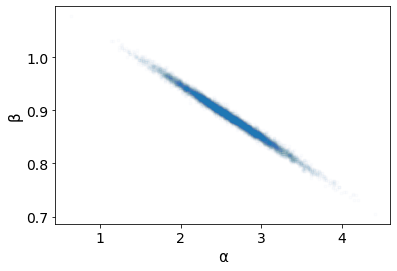

In [13]:
az.plot_pair(trace_g,var_names=['α','β'], scatter_kwargs={'alpha': 0.01})

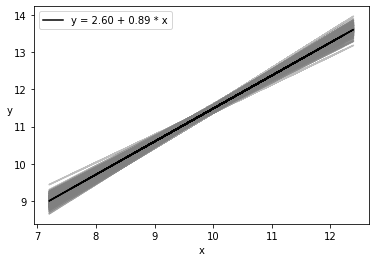

In [43]:
#plt.plot(x, y, 'C0.')

res = az.summary(trace_g)
alpha_m = res.loc['α']['mean']
beta_m  = res.loc['β']['mean']

#print(res)


trace_a = trace_g['posterior']['α'][0].values 
trace_b = trace_g['posterior']['β'][0].values 

draws = range(0, len(trace_g['posterior']['α'][0]), 10)


plt.plot(x, trace_a[draws] + trace_b[draws]
         * x[:, np.newaxis], c='gray', alpha=0.5);

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x');

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();


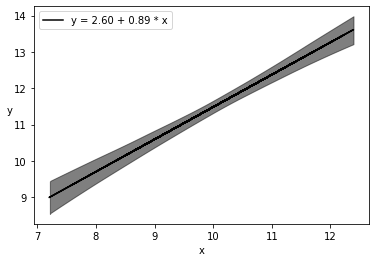

In [44]:
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

sig = az.plot_hdi(x, trace_g.posterior['μ'], hdi_prob=0.999, color='k')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()



In [45]:
ppc = pm.sample_posterior_predictive(trace_g, samples=4000, model=model_g)

/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'y')

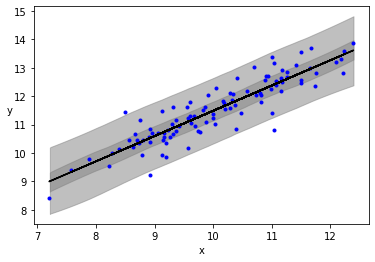

In [46]:
plt.plot(x, y, 'b.')


plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')


az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.5, color='gray')
az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.98, color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)


In [38]:
mus = res.loc[:]['mean'][3 :].values
hdi_3 = res.loc[:]['hdi_3%'][3 :].values
hdi_97 = res.loc[:]['hdi_97%'][3 :].values


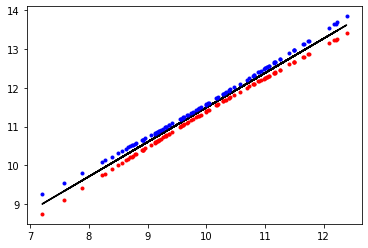

In [58]:

plt.plot(x, mus, c='k')
plt.plot(x,hdi_3, 'r.')
plt.plot(x,hdi_97, 'b.')
#plt.fill_between(x,hdi_3,hdi_97, facecolor = "red")



### Comparison with Ordinary Least Sqaures 

In [59]:
from scipy import stats

In [94]:
lreg = stats.linregress(x,y)

slope = lreg.slope
slope_err = lreg.stderr
interc = lreg.intercept
interc_err = lreg.intercept_stderr


res = az.summary(trace_g)
alpha_m = res.loc['α']['mean']
alpha_s = res.loc['α']['sd']
beta_m  = res.loc['β']['mean']
beta_s = res.loc['β']['sd']

print("\nOLS:\nα= {:1.3} +/- {:1.3}".format(interc,interc_err))
print("β= {:1.3} +/- {:1.3}\n".format(slope,slope_err))
print("\nBayesLR:\nα= {:1.3} +/- {:1.3}".format(alpha_m,alpha_s))
print("β= {:1.3} +/- {:1.3}\n".format(beta_m,beta_s))


OLS:
α= 2.57 +/- 0.438
β= 0.892 +/- 0.0434


BayesLR:
α= 2.6 +/- 0.447
β= 0.889 +/- 0.044



### Exercise: Robust linear regression with Anscombe Dataset 

In [134]:
import io
import csv 
import requests
import pandas as pd

target_url = 'https://raw.githubusercontent.com/cfteach/brds/main/datasets/anscombe.csv' 

download = requests.get(target_url).content
ans = pd.read_csv(io.StringIO(download.decode('utf-8')))


x_3 = ans[ans.group == 'III']['x'].values

x_3 = ans[ans.group == 'III']['x'].values
y_3 = ans[ans.group == 'III']['y'].values
x_3 = x_3 - x_3.mean()

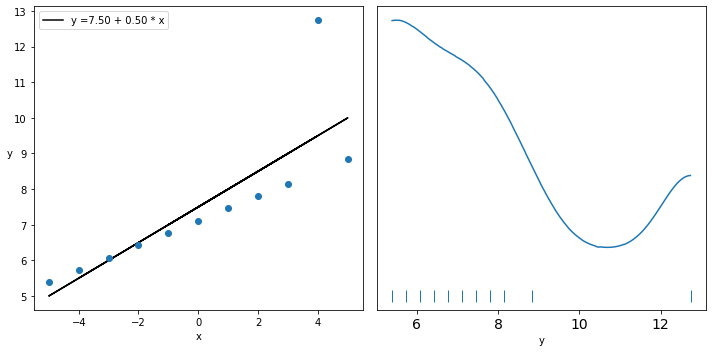

In [135]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
lreg = stats.linregress(x_3, y_3)

beta_c, alpha_c = lreg[:2]

ax[0].plot(x_3, (alpha_c + beta_c * x_3), 'k',
           label=f'y ={alpha_c:.2f} + {beta_c:.2f} * x')
ax[0].plot(x_3, y_3, 'C0o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].legend(loc=0)
az.plot_kde(y_3, ax=ax[1], rug=True)
ax[1].set_xlabel('y')
ax[1].set_yticks([])
plt.tight_layout()


In [136]:
with pm.Model() as model_t:
    α = pm.Normal('α', mu=y_3.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) #a shifted exponential to avoid values of ν close to 0 

    y_pred = pm.StudentT('y_pred', mu=α + β * x_3,
                         sd=ϵ, nu=ν, observed=y_3)

    trace_t = pm.sample(5000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β, α]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


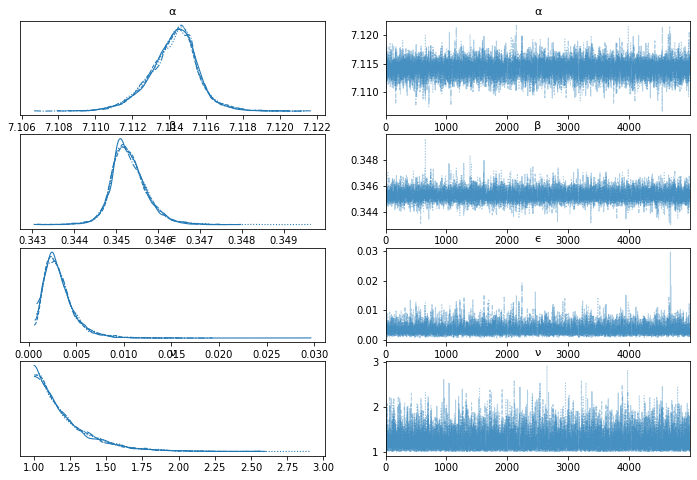

In [138]:
varnames = ['α', 'β', 'ϵ', 'ν']
az.plot_trace(trace_t, var_names=varnames);

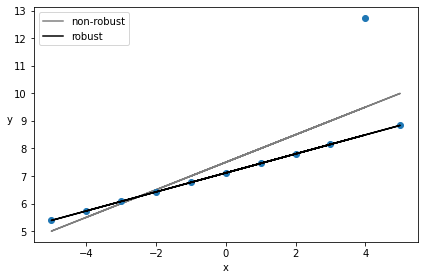

In [139]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]

rest = az.summary(trace_t)


plt.plot(x_3, (alpha_c + beta_c * x_3), 'k', label='non-robust', alpha=0.5)
plt.plot(x_3, y_3, 'C0o')
alpha_m = rest.loc['α']['mean']
beta_m  = rest.loc['β']['mean']
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robust')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=2)
plt.tight_layout()

In [140]:
az.summary(trace_t, var_names=varnames)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,7.114,0.001,7.112,7.117,0.000,0.000,10694.0,10221.0,1.0
β,0.345,0.000,0.345,0.346,0.000,0.000,9272.0,8380.0,1.0
ϵ,0.003,0.002,0.001,0.006,0.000,0.000,4064.0,2033.0,1.0
ν,1.212,0.203,1.000,1.581,0.002,0.001,7615.0,5699.0,1.0


In [141]:
ppc = pm.sample_posterior_predictive(trace_t, samples=200, model=model_t, random_seed=2)

/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Text(0.5, 0, 'y')

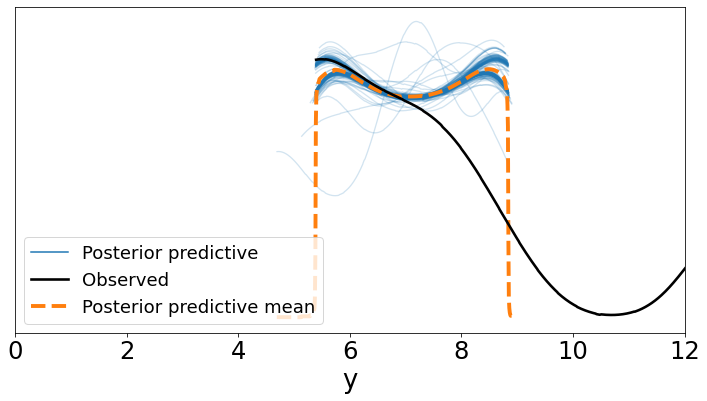

In [142]:
data_ppc = az.from_pymc3(posterior_predictive=ppc, model = model_t)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
plt.xlim(0, 12)
plt.xlabel('y')

/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'y')

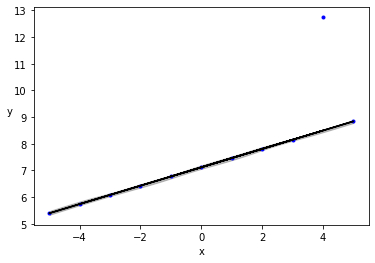

In [146]:
plt.plot(x_3, y_3, 'b.')

plt.plot(x_3, alpha_m + beta_m * x_3, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')


az.plot_hdi(x_3, ppc['y_pred'], hdi_prob=0.5, color='gray')
az.plot_hdi(x_3, ppc['y_pred'], hdi_prob=0.98, color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)



Text(0, 0.5, 'y')

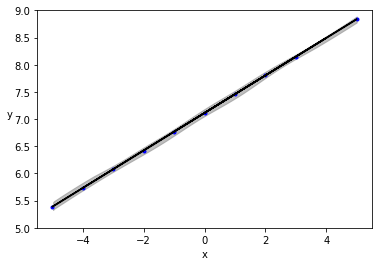

In [147]:
plt.ylim(5.,9.)

plt.plot(x_3, y_3, 'b.')

plt.plot(x_3, alpha_m + beta_m * x_3, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')


az.plot_hdi(x_3, ppc['y_pred'], hdi_prob=0.5, color='gray')
az.plot_hdi(x_3, ppc['y_pred'], hdi_prob=0.98, color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)